<h1><center>HYBRID ARIMA-LSTM MODELS</center></h1>
<h2><center>CORRELATION PREDICTION</center></h2>

We applied an ARIMA-LSTM hybrid model to predict future price correlation coefficients of two assets
The paper is uploaded on https://arxiv.org/abs/1808.01560.
I'm open for any comments on my work. Please email me at imhgchoi@korea.ac.kr.




## 1. OVERVIEW

Predicting the price correlation of two assets for future time periods is important in portfolio optimization. We apply LSTM recurrent neural networks (RNN) in predicting the stock price correlation coefficient of two individual stocks. 

RNNs are competent in understanding temporal dependencies. The use of LSTM cells further enhances its long term predictive properties. To encompass both linearity and nonlinearity in the model, we adopt the ARIMA model as well. The ARIMA model filters linear tendencies in the data and passes on the residual value to the LSTM model. The ARIMA LSTM hybrid model is tested against other traditional predictive financial models such as the full historical model, constant correlation model, single index model and the multi group model. 

In our empirical study, the predictive ability of the ARIMA-LSTM model turned out superior to all other financial models by a significant scale. Our work implies that it is worth considering the ARIMA LSTM model to forecast correlation coefficient for portfolio optimization.




### 1.1. DATASET FILES

> - SP500_list.csv : The list of S&P500 firms and their tickers. I scraped the data from wikipedia

> - SP500_index.csv : The market value corresponding to the time span used in my research

> - stock08_price.csv : The final price dataset after preprocessing

> - train_dev_test folder : All the train / development / test1 / test2 datasets needed for each step

> - stock_data folder : Individual stock price data downloaded


### 1.2. ARIMA MODEL SECTION


> - DATA_PREPROCESSING.ipynb : Data preprocessing codes such as NA imputation, reshaping etc..

> - ARIMA_MODELING.ipynb : The ARIMA codes to compute the residual values

> - NEW_ASSET_ARIMA_MODELING.ipynb : After generating model, we test on different assets iteratively. This is the ARIMA section of it


### 1.3. LSTM-CELL RNN MODEL SECTION


> - models folder : The LSTM models saved for each epoch + The evaluated metric values for each epoch

>-  MODEL_EVALUATOR.ipynb : The model performance is tested against other financial models




### 1.4. MAIN API's USED IN THIS EXAMPLE

> - BeautifulSoup : For web scraping S&P500 firms

> - Quandl : To download financial data

> - pyramid-arima : ARIMA modeling section

> - Keras : LSTM modeling section


### 1.5. USING THE MODEL ONCE CALCULATED

> - Download two assets' most recent 2000-day-long price data that you wish the correlation coefficient to be predicted.

> - With a 100-day-window, calculate their correlation coefficient, with a 100 day stride. That will generate 20 time steps.

> - With the 20 time step, fit the most appropriate ARIMA model and calculate its residuals. Ideally, you could use the 'auto-arima' function in 'pyramid-arima' module. (NOTE: You should also forecast the 21st time step for later use!)

> -  Now you have your 20 time step data for the LSTM model ready. Download the 'epoch247' from the 'models/hybrid_LSTM' folder.

> -  Pass the residual data through the epoch247 model and get your result.

> -  Add the output result to the 21st ARIMA forecast value to get your final result! (NOTE: Rarely, the value might be out of bound; that is, smaller than -1 or bigger than 1. If that's the case, apply MIN(prediction, 1) or MAX(prediction, -1) )

## 2. THEORETICAL FINANCE FRAMEWORK

### 2.1. ON THE INCONVENIENCES OF UNSTABLE RETURN - CORRELATION MATRICES

When constructing and selecting a portfolio for investment, evaluation of
its expected returns and risks is considered the bottom line. 

Markowitz has
introduced the Modern Portfolio Theory which proposes methods to quantify
returns and risks of a portfolio, in his paper ‘Portfolio Selection’ (1952).

With the derived return and risk, we draw the efficient frontier, which is a
curve that connects all the combination of expected returns and risks that
yield the highest return-risk ratio. Investors then select a portfolio on the
efficient frontier, depending on their risk tolerance.


However, there have been criticisms on Markowitz’s assumptions. One
of them is that the correlation coefficient used in measuring risk is constant and fixed. According to Francois Chesnay & Eric Jondeau’s empirical
study on correlation coefficients, stock markets’ prices tend to have positive
correlations during times of financial turbulence.

This implies that the correlation of any two assets may as well deviate from mean historical correlation coefficients subject to financial conditions; thus, the correlation is
not stable. Frank Fabozzi, Francis Gupta and Harry Markowitz himself also
briefly discussed the shortcomings of the Modern Portfolio Theory in their
paper, ‘The Legacy of Modern Portfolio Theory’ (2002)


Acknowledging such pitfalls of the full historical correlation coefficient
evaluation measures, numerous models for correlation coefficient prediction
have been devised. One alternative is the Constant Correlation model, which
sets all pairs of assets’ correlations equal to the mean of all the correlation
coefficients of the assets in the portfolio . Some other forecast models
include the Multi-Group model and the Single-Index model. 

Although there have been many financial and statistical
approaches to estimate future correlation, few have implemented the neural
network to carry out the task. Neural networks are frequently used to predict future stock returns and have produced noteworthy results.

**Given that
stock correlation data can also be represented as time series data – deriving
the correlation coefficient dataset with a rolling time window – application of
neural networks in forecasting future correlation coefficients can be expected
to have successful results as well.**


In this paper, we suggest a hybrid model of the ARIMA and the neural network to predict future correlation coefficients of stock pairs that are
randomly selected among the S&P500 corporations. The model adopts the
Recurrent Neural Network with Long Short-Term Memory cells (for convenience, the model using this cell will be called LSTM in the rest of our paper).
To better predict the time series trend, we also utilize the ARIMA model. In
the first phase, the ARIMA model catches the linear tendencies in the time
series data. Then, the LSTM model attempts to capture nonlinearity in the
residual values, which is the output of the former phase. This ARIMA and
neural network hybrid model was discussed in Peter Zhang’s literature [19],
and an empirical study was conducted by James Hansen and Ray Nelson
on a variety of time series data [10]. The model architecture used in these
literatures are different from what is demonstrated in our paper. We only
focus on the hybrid model’s versatile predictive potential to capture both
linearity and nonlinearity. Further model details will be elaborated at part
3, ‘The ARIMA-LSTM Hybrid Model’.
In the final evaluation step, the ARIMA-LSTM hybrid model will be
tested on two time periods which were not involved in the training step. The
layout and methodology of this research will be discussed in detail at part 4,
‘Research Methodology’. The data will be explored as well in this section.
The performance of the model will then be compared with that of the full
historical model as well as other frequently used predictive models that are
introduced in part 2. Finally, the results will be summarized and evaluated
in part 5, ‘Results and Evaluation’.


### 2.2. THE IDEA OF A HYBRID ARIMA LSTM MODEL


In this paper, we suggest a hybrid model of the ARIMA and the neural network to predict future correlation coefficients of stock pairs that are randomly selected among the S&P500 corporations. 

The model adopts the Recurrent Neural Network with Long Short-Term Memory cells (for convenience, the model using this cell will be called LSTM in the rest of our paper).

#### STAGE 1. GET THE "TREND" FROM AN ARIMA MODEL
To better predict the time series trend, we also utilize the ARIMA model. In
the first phase, the ARIMA model catches the linear tendencies in the time
series data. 

#### STAGE 2. IMPROVE THE NON LINEARITIES WITH AN LSTM MODEL 
Then, the LSTM model attempts to capture nonlinearity in the
residual values, which is the output of the former phase. This ARIMA and
neural network hybrid model was discussed in Peter Zhang’s literature ,
and an empirical study was conducted by **James Hansen and Ray Nelson**
on a variety of time series data . 

## 3. PREPROCESSING THE DATA


In this paper, we resolve to utilize the adjusted close’ price of the S&P500.


> - The price data from 2008-01-01 to 2017-12-31 of the S&P500 firmsare downloaded 

> - The data has a small ratio of missing values. 

> - Then, we randomly select 150 stocks from the fully imputed price dataset. 

>- Using the fully imputed 150 set of price data, we compute the correlation coefficient of each pair of assets with a 100-day time window. In order to add diversity, we set five different starting values,

---

> - 1st
> - 21st
> - 41st
> - 61st 
> - 81st

---

each apply a rolling 100-day window with a 100-day stride until the end of the
dataset. 

> - This process renders 55875 sets of time series data, each with 24 time steps. 

> - Finally, we generate the train, development, and test 1 & 2


data set with the 55875 × 24 data. That is, for each pair and for each starting date there will be a series of 24 correlation coefficients. We split the data as follows by means to
implement the walk-forward optimization in the model evaluation phase.


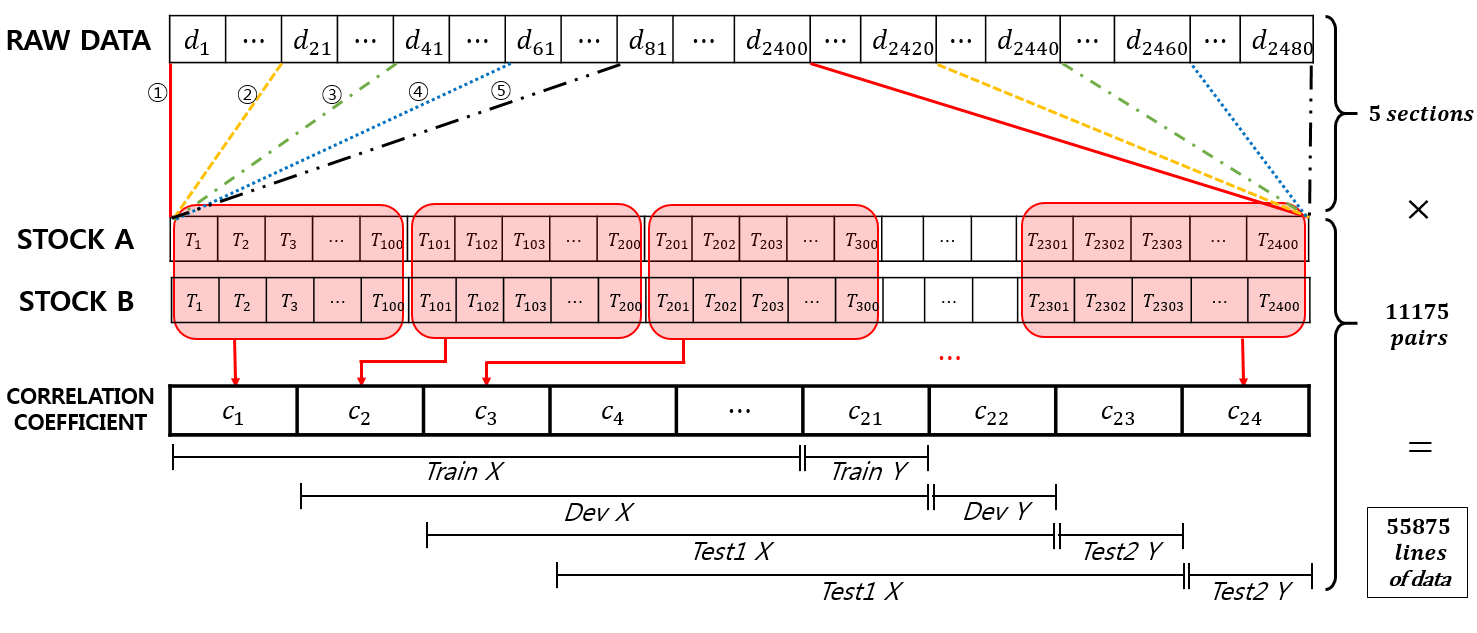

### 4. THE NOTIONS BEHIND THE HYBRID MODEL

#### THE ARIMA PART OF THE MODEL

Before fitting an ARIMA model, the order of the model must be specified.

> The ACF plot and the PACF plot aids the decision process. Most of the
datasets showed an oscillatory trend that seemed close to a white noise as
shown in Table 1. Other notable trends includes an increasing/decreasing
trend, occasional big dips while steady correlation coefficient, and having
mixed oscillatory-steady periods. 

> Although the ACF/PACF plots indicate
that a great portion of the datasets are close to a white noise, several orders
(p, d, q) = (1, 1, 0), (0, 1, 1), (1, 1, 1), (2, 1, 1), (2, 1, 0) seems applicable.

> We fit the ARIMA model with these five orders and select the model with
the least AIC value, for each train/development/test1/test2 dataset’s data.

The method we use to compute the log likelihood function for the AIC metric
is the maximum likelihood estimator.
After fitting the ARIMA model, we generate predictions for each 21 time
steps to compute the residual value. 

Then, the last data point of each data
will serve as the target variable Y, and the rest as variable X. 

**The
newly X/Y-split datasets will be the input values for the next LSTM model
sector**

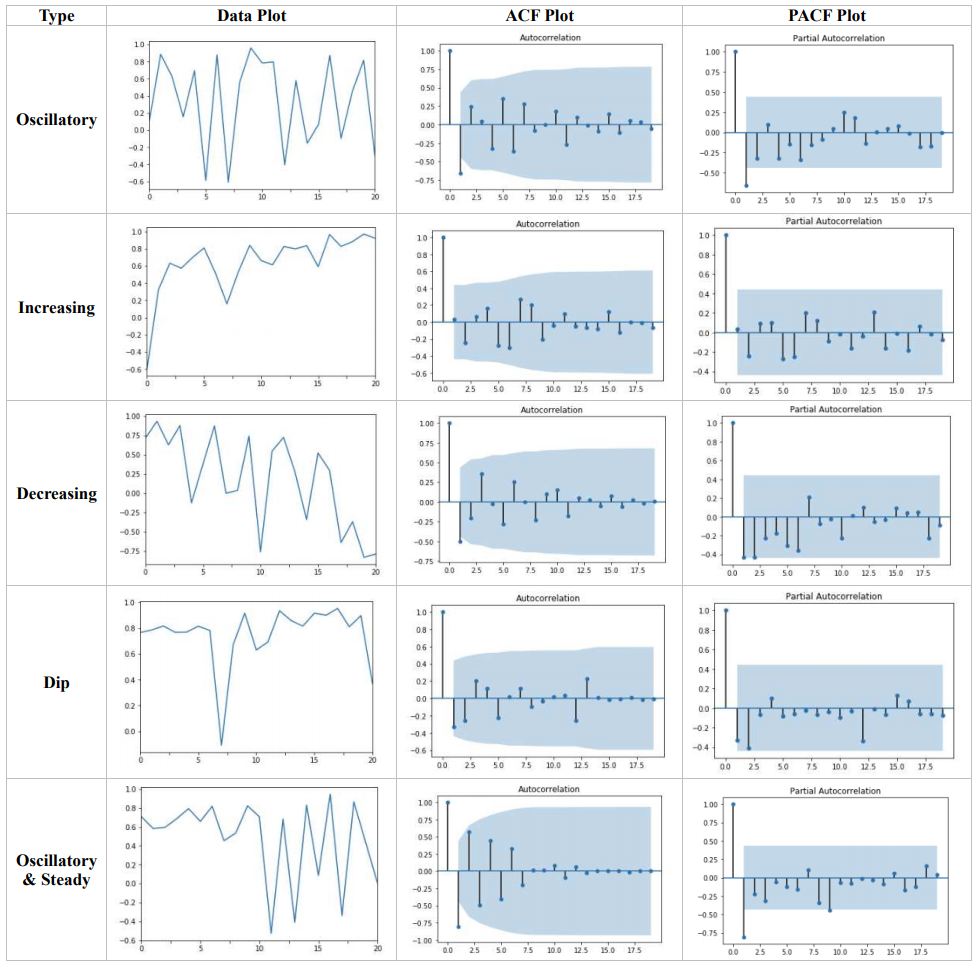

#### THE LSTM PART OF THE MODEL

**We use the residual values, derived from the ARIMA model, of the 150
randomly selected S&P500 stocks as input for the LSTM model.** 

**The datasets**

> - include the train X/Y, development X/Y, test1 X/Y, and test2 X/Y. 
> - Each X dataset has 55875 lines with 20 time steps, with a corresponding Y dataset
 for each time series.

The data points are generally around 0, as
the input is a residual dataset.

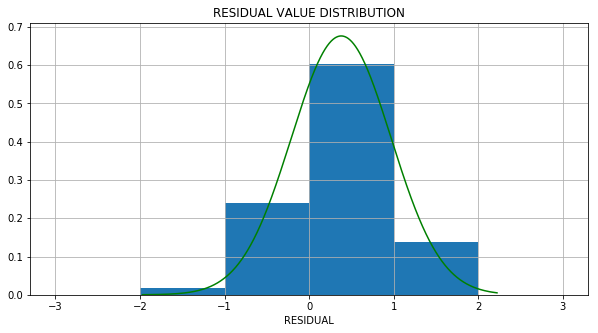

**The architecture of the model for our task is:**

> - an RNN neural network that employs 25 LSTM units. 
> - The last outputs of 25 LSTM units is merged into a single value with a fully connected layer. 
> - Then, the value will be passed through a doubled-hyperbolic tangent activation function to output a single final prediction. The doubled-hyperbolic tangent is simply the hyperbolic
> - We utilize the keras module to train the LSTM model


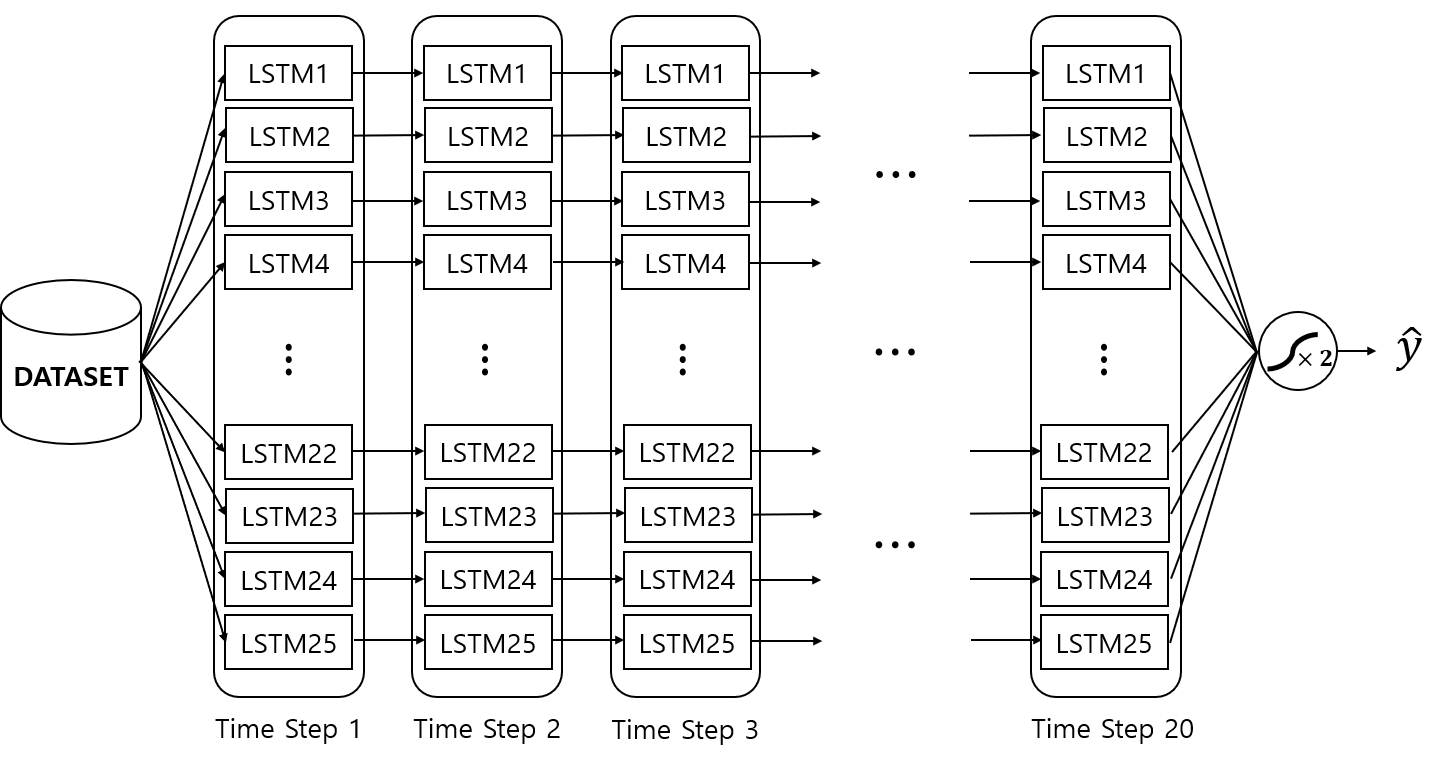

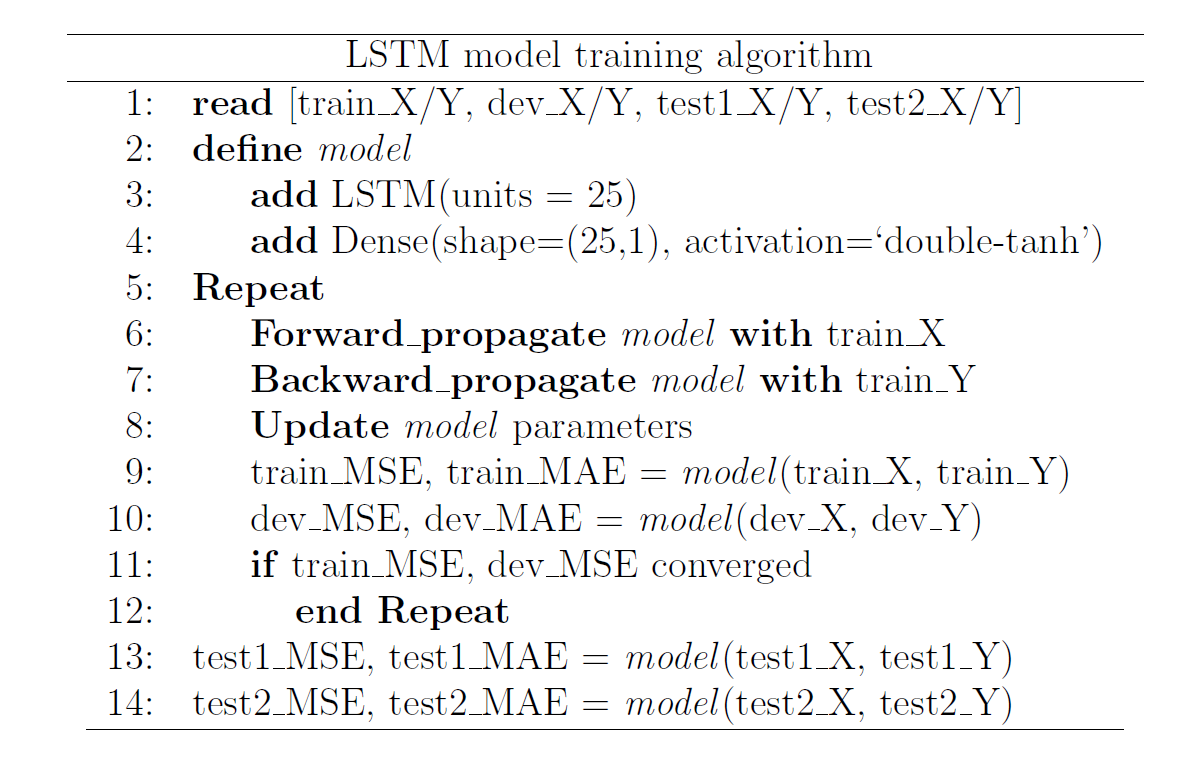

### 5. EVALUATING THE RESULTS

After around 200 epochs, the train dataset’s MSE value and development
dataset’s MSE value started to converge.

The MAE learning curve
showed a similar trend as well.

- Among the models, we selected the 247th
epoch’s model. 

- The epoch was decided based on both the overfitting metric and the performance metric. The overfitting metric was represented with
the normalized value of the MSE difference between the train & development
dataset. 

- And the performance metric was represented with the normalized
value of the MSE sum of the train & development datset. 

- Then, the sum of
the two normalized value was calculated to find the epoch that had the least
value. The mathematical representation of the criterion is as follows.


criterion = diffMSE − mean(diffMSE)
stdev(diffMSE)
+
sumMSE − mean(sumMSE)
stdev(sumMSE)


With the selected ARIMA-LSTM hybrid model, the MSE, RMSE and
MAE values of the prediction were calculated. 

The MSE value on the development, test1, and test2 dataset were 0.1786, 0.1889, 0.2154 each. 

The values have small variations, which means the model has been generalized
adequately.

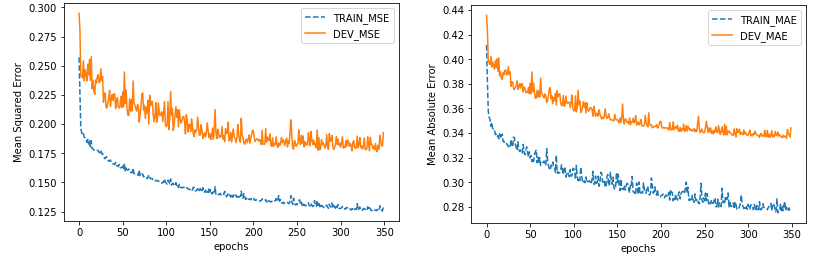

## 6. COMPARATIVE PERFORMANCE


The walk-forward optimization method  is used as the evaluation
method. The walk-forward optimization requires that a model be fitted for
each rolling time intervals. Then, for each time interval, the newly trained
model is tested on the next time step. This ensures the robustness of the
model fitting strategy. However, this process is computationally expensive.
In addition, our paper's motive is to t parameters of a model that generalizes
well on various assets as well as on different time periods. Thus, it is
needless to train multiple models to approve of the model-fitting strategy.
Rather than training a new model for each rolling train-set window, we resolve
to train a single model with the frst window and apply it to three time
intervals the development set and the test1/test2 set.
We selected our optimal model with the Mean Squared Error (MSE)
metric. That is, the cost function of our model was the MSE. For further
evaluation, the Mean Absolute Error (MAE) and Root Mean Squared Error(
RMSE) was also investigated.

The selected optimal model is then tested on two recent time periods. We
use two separate datasets to test the model because the development set is
deemed to be involved in the learning process as well.
If the model's correlation coecient prediction on two time periods turn
out decent as well, we then test our model against former nancial predictive
models. The MSE and MAE values are computed for the four nancial
models as well. For the constant correlation model and the multi-group
model, we regarded the 150 assets we selected randomly to be our portfolio
constituents.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###  6.1. LSTM MODEL

In [ ]:
Reg = False
ELBOW = 5
d = 'hybrid_LSTM'

if Reg :
    d += '_with_reg'
scores = pd.read_csv("models/"+d+".csv")
mse_columns = ['TRAIN_MSE','DEV_MSE']
mae_columns = ['TRAIN_MAE','DEV_MAE']
test_columns = ['TEST1_MSE', 'TEST2_MSE']

#print(scores)

end_epoch = scores.shape[0]
print(end_epoch)
plt.plot(scores[mse_columns[0]][:end_epoch],'--')
plt.plot(scores[mse_columns[1]][:end_epoch])
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()
plt.plot(scores[mae_columns[0]][:end_epoch],'--')
plt.plot(scores[mae_columns[1]][:end_epoch])
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Absolute Error')
plt.show()
plt.close()
plt.plot(scores[test_columns[0]][:end_epoch],'--')
plt.plot(scores[test_columns[1]][:end_epoch])
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()



score_diff = (scores[mse_columns[1]]-scores[mse_columns[0]])[ELBOW:]

score_sum = (scores[mse_columns[1]]+scores[mse_columns[0]])[ELBOW:]

score_diff_norm = (score_diff - np.mean(score_diff))/np.std(score_diff)
score_sum_norm = (score_sum - np.mean(score_sum))/np.std(score_sum)
score_total = score_diff_norm + score_sum_norm
idx = np.argmin(score_total)
print('< OPT. SCORE_SUM EPOCH ',str(idx+1),'> : '+str(score_total[idx]))
print('opt. DEV MSE : ',str(scores[mse_columns[1]][idx]))
print('opt. TEST1 MSE : ',str(scores[test_columns[0]][idx]))
print('opt. TEST2 MSE : ',str(scores[test_columns[1]][idx]))

### 6.2 TESTING OTHER MODELS

In [ ]:
dev = pd.read_csv("dev.csv")
test2 = pd.read_csv("test2.csv")
test1 = pd.read_csv("test1.csv")

dev = dev.loc[:, ~dev.columns.str.contains('^Unnamed')]
test1 = test1.loc[:, ~test1.columns.str.contains('^Unnamed')]
test2 = test2.loc[:, ~test2.columns.str.contains('^Unnamed')]

### HISTORICAL MODEL

In [ ]:
STEP = 20

In [ ]:
dev_pred = np.array(dev['20'])
dev_y = np.array(dev['21']).reshape(1,int(1117500/STEP))[0]
test1_pred = np.array(test1['21'])
test1_y = np.array(test1['22']).reshape(1,int(1117500/STEP))[0]
test2_pred = np.array(test2['22'])
test2_y = np.array(test2['23']).reshape(1,int(1117500/STEP))[0]

dev_mse = sum((dev_pred-dev_y)**2)/len(dev_pred)
dev_mae = sum(abs(dev_pred-dev_y))/len(dev_pred)
test1_mse = sum((test1_pred-test1_y)**2)/len(test1_pred)
test1_mae = sum(abs(test1_pred-test1_y))/len(test1_pred)
test2_mse = sum((test2_pred-test2_y)**2)/len(test2_pred)
test2_mae = sum(abs(test2_pred-test2_y))/len(test2_pred)

hist_matrix = [[dev_mse, dev_mae], [test1_mse, test1_mae], [test2_mse, test2_mae]]
for i in hist_matrix :
    print(str(i[0]) + '/' + str(i[1]))

### CONSTANT CORRELATION MODEL

In [ ]:
pred = sum(dev['20'])/int(1117500/STEP)
dev_pred = np.array([pred] * int(1117500/STEP))
pred = sum(test1['21'])/int(1117500/STEP)
test1_pred = np.array([pred] * int(1117500/STEP))
pred = sum(test2['22'])/int(1117500/STEP)
test2_pred = np.array([pred] * int(1117500/STEP))

dev_mse = sum((dev_pred-dev_y)**2)/len(dev_pred)
dev_mae = sum(abs(dev_pred-dev_y))/len(dev_pred)
test1_mse = sum((test1_pred-test1_y)**2)/len(test1_pred)
test1_mae = sum(abs(test1_pred-test1_y))/len(test1_pred)
test2_mse = sum((test2_pred-test2_y)**2)/len(test2_pred)
test2_mae = sum(abs(test2_pred-test2_y))/len(test2_pred)

cc_matrix = [[dev_mse, dev_mae], [test1_mse, test1_mae], [test2_mse, test2_mae]]
for i in cc_matrix :
    print(str(i[0]) + '/' + str(i[1]))

### MULTI GROUP MODEL

In [ ]:
data_df = pd.read_csv('dataset.csv')
data_df = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]
num_list = []
for i in range(24):
    num_list.append(str(i))
data_df = data_df[num_list].copy()
data_df = np.transpose(data_df)

In [ ]:
data = pd.read_csv('SP500_list.csv')
print(data['GICS_sector'].unique())
print(data.head())

In [ ]:
# portfolio list
portfolio = ['CELG', 'PXD', 'WAT', 'LH', 'AMGN', 'AOS', 'EFX', 'CRM', 'NEM', 'JNPR', 'LB', 'CTAS', 'MAT', 'MDLZ', 'VLO', 'APH', 'ADM', 'MLM', 'BK', 'NOV', 'BDX', 'RRC', 'IVZ', 'ED', 'SBUX', 'GRMN', 'CI', 'ZION', 'COO', 'TIF', 'RHT', 'FDX', 'LLL', 'GLW', 'GPN', 'IPGP', 'GPC', 'HPQ', 'ADI', 'AMG', 'MTB', 'YUM', 'SYK', 'KMX', 'AME', 'AAP', 'DAL', 'A', 'MON', 'BRK', 'BMY', 'KMB', 'JPM', 'CCI', 'AET', 'DLTR', 'MGM', 'FL', 'HD', 'CLX', 'OKE', 'UPS', 'WMB', 'IFF', 'CMS', 'ARNC', 'VIAB', 'MMC', 'REG', 'ES', 'ITW', 'NDAQ', 'AIZ', 'VRTX', 'CTL', 'QCOM', 'MSI', 'NKTR', 'AMAT', 'BWA', 'ESRX', 'TXT', 'EXR', 'VNO', 'BBT', 'WDC', 'UAL', 'PVH', 'NOC', 'PCAR', 'NSC', 'UAA', 'FFIV', 'PHM', 'LUV', 'HUM', 'SPG', 'SJM', 'ABT', 'CMG', 'ALK', 'ULTA', 'TMK', 'TAP', 'SCG', 'CAT', 'TMO', 'AES', 'MRK', 'RMD', 'MKC', 'WU', 'ACN', 'HIG', 'TEL', 'DE', 'ATVI', 'O', 'UNM', 'VMC', 'ETFC', 'CMA', 'NRG', 'RHI', 'RE', 'FMC', 'MU', 'CB', 'LNT', 'GE', 'CBS', 'ALGN', 'SNA', 'LLY', 'LEN', 'MAA', 'OMC', 'F', 'APA', 'CDNS', 'SLG', 'HP', 'XLNX', 'SHW', 'AFL', 'STT', 'PAYX', 'AIG', 'FOX', 'MA']

In [ ]:
pf_sector_item = {'Industrials':[],
                  'Health Care':[],
                  'Information Technology':[],
                  'Consumer Discretionary':[],
                  'Utilities':[],
                  'Financials' :[],
                  'Materials':[],
                  'Real Estate':[],
                  'Consumer Staples':[],
                  'Energy':[],
                  'Telecommunication Services':[]}
for item in portfolio :
    pf_sector_item[data[data.ticker == item]['GICS_sector'].values[0]] = pf_sector_item[data[data.ticker == item]['GICS_sector'].values[0]]+[item]
print(pf_sector_item)


In [ ]:
market_data = pd.read_csv('stock08_price.csv')
pf_sector_dev = {}
pf_sector_test1 = {}
pf_sector_test2 = {}

for i in range(150):
    for j in range(149-i):
        a = portfolio[i]
        b = portfolio[149-j]
        a_price = market_data[a]
        b_price = market_data[b]
        a_sector = data[data.ticker == a]['GICS_sector'].values[0]
        b_sector = data[data.ticker == b]['GICS_sector'].values[0]
        sector_pair = max(a_sector, b_sector)+'_'+min(a_sector, b_sector)
        
        dev = []
        test1 = []
        test2 = []
        for k in range(5):
            dev_start = 2000 + k*20
            test1_start = 2100 + k*20
            test2_start = 2200 + k*20
            dev.append(a_price[dev_start:dev_start+100].corr(b_price[dev_start:dev_start+100]))
            test1.append(a_price[test1_start:test1_start+100].corr(b_price[test1_start:test1_start+100]))
            test2.append(a_price[test2_start:test2_start+100].corr(b_price[test2_start:test2_start+100]))
        
        try:
            pf_sector_dev[sector_pair] = pf_sector_dev[sector_pair] + [dev]
        except KeyError :
            pf_sector_dev[sector_pair] = [dev]
            
        try:
            pf_sector_test1[sector_pair] = pf_sector_test1[sector_pair] + [test1]
        except KeyError :
            pf_sector_test1[sector_pair] = [test1]
            
        try:
            pf_sector_test2[sector_pair] = pf_sector_test2[sector_pair] + [test2]
        except KeyError :
            pf_sector_test2[sector_pair] = [test2]

In [ ]:
pairs = [key for key in pf_sector_dev]
sector_pair_corr_dev = {}
sector_pair_corr_test1 = {}
sector_pair_corr_test2 = {}
for pair in pairs :
    dev_zeroes = np.array([0] * 5)
    test1_zeroes = np.array([0] * 5)
    test2_zeroes = np.array([0] * 5)
    dev_length = len(pf_sector_dev[pair])
    test1_length = len(pf_sector_test1[pair])
    test2_length = len(pf_sector_test2[pair])
    for arr in pf_sector_dev[pair] :
        dev_zeroes = dev_zeroes + np.array(arr)
        dev_result = dev_zeroes/dev_length
    for arr in pf_sector_test1[pair] :
        test1_zeroes = test1_zeroes + np.array(arr)
        test1_result = test1_zeroes/test1_length
    for arr in pf_sector_test2[pair] :
        test2_zeroes = test2_zeroes + np.array(arr)
        test2_result = test2_zeroes/test2_length
    sector_pair_corr_dev[pair] = dev_result
    sector_pair_corr_test1[pair] = test1_result
    sector_pair_corr_test2[pair] = test2_result

In [ ]:
num_list = [STEP*i for i in range(int(1117500/STEP))]
dataset = pd.read_csv("dataset.csv")
dev_y = dataset['21'].copy()
test1_y = dataset['22'].copy()
test2_y = dataset['23'].copy()

dev_y = np.array(dev_y[num_list]).reshape(1,int(1117500/STEP))[0]
test1_y = np.array(test1_y[num_list]).reshape(1,int(1117500/STEP))[0]
test2_y = np.array(test2_y[num_list]).reshape(1,int(1117500/STEP))[0]

dev_pred = []
test1_pred = []
test2_pred = []
for i in range(150):
    for j in range(149-i):
        a = portfolio[i]
        b = portfolio[149-j]
        a_sector = data[data.ticker == a]['GICS_sector'].values[0]
        b_sector = data[data.ticker == b]['GICS_sector'].values[0]
        sector_pair = max(a_sector, b_sector)+'_'+min(a_sector, b_sector)
        
        dev_pred = dev_pred + list(sector_pair_corr_dev[sector_pair])
        test1_pred = test1_pred + list(sector_pair_corr_test1[sector_pair])
        test2_pred = test2_pred + list(sector_pair_corr_test2[sector_pair])
dev_pred = np.array(dev_pred)
test1_pred = np.array(test1_pred)
test2_pred = np.array(test2_pred)


dev_mse = sum((dev_pred-dev_y)**2)/len(dev_pred)
dev_mae = sum(abs(dev_pred-dev_y))/len(dev_pred)
test1_mse = sum((test1_pred-test1_y)**2)/len(test1_pred)
test1_mae = sum(abs(test1_pred-test1_y))/len(test1_pred)
test2_mse = sum((test2_pred-test2_y)**2)/len(test2_pred)
test2_mae = sum(abs(test2_pred-test2_y))/len(test2_pred)

mg_matrix = [[dev_mse, dev_mae], [test1_mse, test1_mae], [test2_mse, test2_mae]]
for i in mg_matrix :
    print(str(i[0]) + '/' + str(i[1]))

### SINGLE INDEX MODEL

In [ ]:
data_df = pd.read_csv('stock08_price.csv')
data_df = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]


In [ ]:
dev_pred = []
test1_pred = []
test2_pred = []

for i in range(150):
    for j in range(149-i):
        a = portfolio[i]
        b = portfolio[149-j]
        for k in range(5):
            dev_start = 2000 + k*20
            test1_start = 2100 + k*20
            test2_start = 2200 + k*20
            dev_pred.append(data_df[a][dev_start:dev_start+100].corr(data_df['SP500'][dev_start:dev_start+100]) *
                            data_df[b][dev_start:dev_start+100].corr(data_df['SP500'][dev_start:dev_start+100]))
            test1_pred.append(data_df[a][test1_start:test1_start+100].corr(data_df['SP500'][test1_start:test1_start+100])*
                              data_df[b][test1_start:test1_start+100].corr(data_df['SP500'][test1_start:test1_start+100]))
            test2_pred.append(data_df[a][test2_start:test2_start+100].corr(data_df['SP500'][test2_start:test2_start+100])*
                              data_df[b][test2_start:test2_start+100].corr(data_df['SP500'][test2_start:test2_start+100]))
dev_pred = np.array(dev_pred)
test1_pred = np.array(test1_pred)
test2_pred = np.array(test2_pred)
            
num_list = [STEP*i for i in range(int(1117500/STEP))]
dataset = pd.read_csv("C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/dataset.csv")
dev_y = dataset['21'].copy()
test1_y = dataset['22'].copy()
test2_y = dataset['23'].copy()

dev_y = np.array(dev_y[num_list]).reshape(1,int(1117500/STEP))[0]
test1_y = np.array(test1_y[num_list]).reshape(1,int(1117500/STEP))[0]
test2_y = np.array(test2_y[num_list]).reshape(1,int(1117500/STEP))[0]

  

dev_mse = sum((dev_pred-dev_y)**2)/len(dev_pred)
dev_mae = sum(abs(dev_pred-dev_y))/len(dev_pred)
test1_mse = sum((test1_pred-test1_y)**2)/len(test1_pred)
test1_mae = sum(abs(test1_pred-test1_y))/len(test1_pred)
test2_mse = sum((test2_pred-test2_y)**2)/len(test2_pred)
test2_mae = sum(abs(test2_pred-test2_y))/len(test2_pred)

mg_matrix = [[dev_mse, dev_mae], [test1_mse, test1_mae], [test2_mse, test2_mae]]
for i in mg_matrix :
    print(str(i[0]) + '/' + str(i[1]))                  

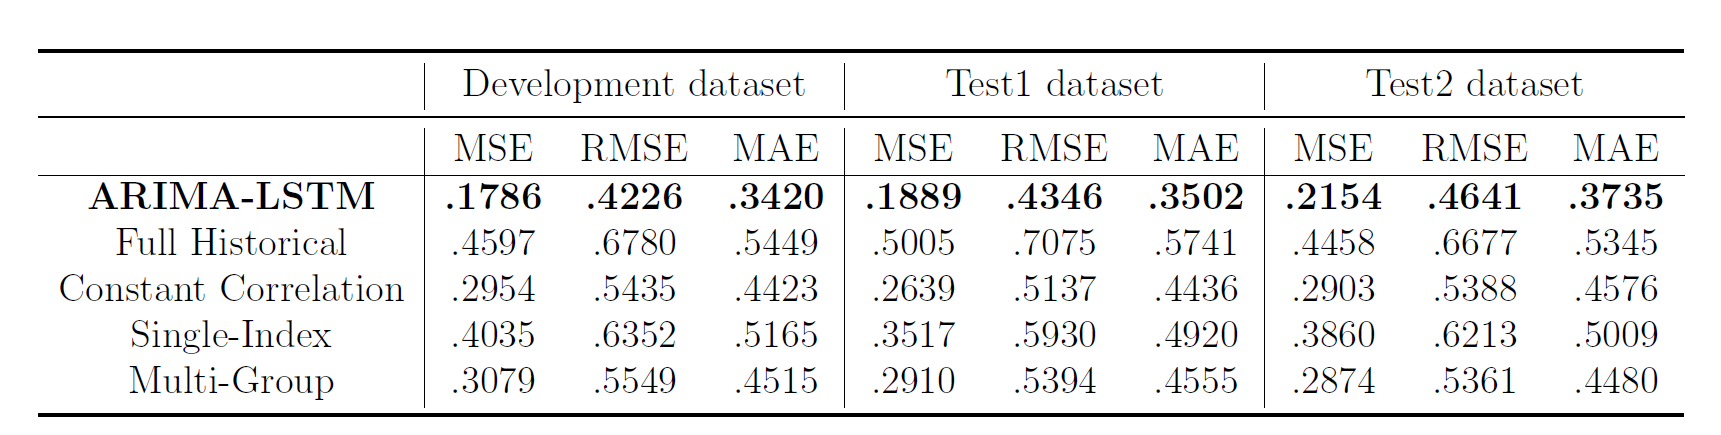


## 7. CONCLUSIONS

The purpose of our empirical study was to propose a model that performs
superior to extant financial correlation coeffcient predictive models.
We adopted the ARIMA-LSTM hybrid model in an attempt to first filter
out linearity in the ARIMA modeling step, then predict nonlinear tendencies
in the LSTM recurrent neural network. The testing results showed that
the ARIMA-LSTM hybrid model performs far superior to other equivalent
financial models. Model performance was validated on both different time
periods and on different combinations of assets with various metrics such as
the MSE, RMSE, and the MAE. The values nearly halved that of the Constant
Correlation model, which, in our experiment, turned out to perform
best among the four financial models. Judging from such outperformance,
we may presume that the ARIMA-LSTM hybrid model has suffcient predictive
potential. Thus, the ARIMA-LSTM model as a correlation cofficient
predictor for portfolio optimization would be considerable. With a better
predictor, the portfolio is optimized more precisely, thereby enhancing returns
in investments.